In [89]:
import numpy as np
import pandas as pd
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, accuracy_score

In [90]:
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [91]:
data.corr()["Outcome"].sort_values  ##The corr() method ignores "not numeric" columns.
##The number varies from -1 to 1.
# i think less 0.1 is bad corr so i drop the some columns.

<bound method Series.sort_values of Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64>

In [92]:
data = data.drop(["Pregnancies", "BloodPressure", "SkinThickness"], axis = 1)
data.columns

Index(['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age',
       'Outcome'],
      dtype='object')

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Glucose                   768 non-null    int64  
 1   Insulin                   768 non-null    int64  
 2   BMI                       768 non-null    float64
 3   DiabetesPedigreeFunction  768 non-null    float64
 4   Age                       768 non-null    int64  
 5   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(4)
memory usage: 36.1 KB


In [94]:
data.describe()

,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,79.799479,31.992578,0.471876,33.240885,0.348958
std,31.972618,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,117.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,140.250000,127.250000,36.600000,0.626250,41.000000,1.000000
max,199.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:xlabel='Outcome', ylabel='count'>

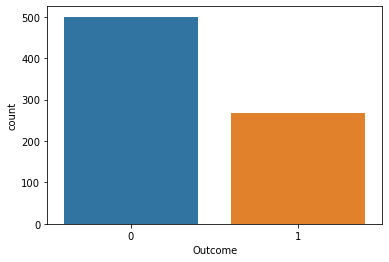

In [95]:
sbn.countplot(x = "Outcome", data = data)

<AxesSubplot:>

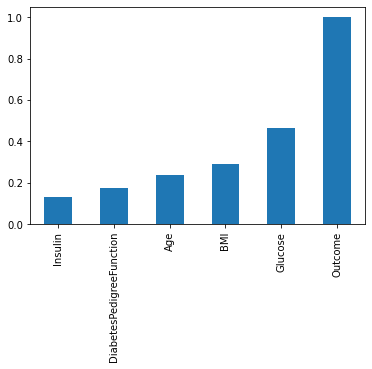

In [96]:
data.corr()["Outcome"].sort_values().plot(kind = "bar")

In [97]:
## X and Y
y = data["Outcome"].values
type(y)

numpy.ndarray

In [98]:
x = data.drop(["Outcome"], axis = 1).values 
type(x)

numpy.ndarray

In [99]:
## test and train
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [100]:
## scaling
scale = MinMaxScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.fit_transform(x_test)

In [101]:
x_train.shape

(537, 5)

In [102]:
y_train.shape

(537,)

In [103]:
x_test.shape

(231, 5)

In [104]:
y_true.shape

(231,)

### model

In [105]:

model = Sequential()

model.add(Dense(units = 30, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))
model.add(Dense(units = 15, activation = "relu"))

model.add(Dense(1, activation = "sigmoid"))

model.compile(loss = "binary_crossentropy", optimizer = "adam")


In [106]:
model.fit(x_train, y_train, epochs = 500, validation_data = (x_test, y_true))

Epoch 1/500
17/17 [==============================] - 1s 19ms/step - loss: 0.6789 - val_loss: 0.6605
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6713 - val_loss: 0.6519
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6671 - val_loss: 0.6456
Epoch 4/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6633 - val_loss: 0.6411
Epoch 5/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6595 - val_loss: 0.6373
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6550 - val_loss: 0.6317
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6470 - val_loss: 0.6213
Epoch 8/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6389 - val_loss: 0.6167
Epoch 9/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6285 - val_loss: 0.6076
Epoch 10/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6191 - val_loss: 0.5991
Epoch 11

17/17 [==============================] - 0s 5ms/step - loss: 0.4413 - val_loss: 0.5382
Epoch 84/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4390 - val_loss: 0.5204
Epoch 85/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4388 - val_loss: 0.5211
Epoch 86/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4392 - val_loss: 0.5099
Epoch 87/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4387 - val_loss: 0.5182
Epoch 88/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4379 - val_loss: 0.5046
Epoch 89/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4405 - val_loss: 0.5519
Epoch 90/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4418 - val_loss: 0.5220
Epoch 91/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4399 - val_loss: 0.5083
Epoch 92/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4364 - val_loss: 0.5372
Epoch 93/500


17/17 [==============================] - 0s 5ms/step - loss: 0.4306 - val_loss: 0.5447
Epoch 165/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4292 - val_loss: 0.5295
Epoch 166/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4306 - val_loss: 0.5502
Epoch 167/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4360 - val_loss: 0.4906
Epoch 168/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4314 - val_loss: 0.5570
Epoch 169/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4371 - val_loss: 0.5426
Epoch 170/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4300 - val_loss: 0.5128
Epoch 171/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4335 - val_loss: 0.5195
Epoch 172/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4317 - val_loss: 0.5370
Epoch 173/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4286 - val_loss: 0.5117
Epoc

17/17 [==============================] - 0s 5ms/step - loss: 0.4268 - val_loss: 0.5094
Epoch 246/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4237 - val_loss: 0.5764
Epoch 247/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4278 - val_loss: 0.5430
Epoch 248/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4236 - val_loss: 0.5442
Epoch 249/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4266 - val_loss: 0.5531
Epoch 250/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4225 - val_loss: 0.5176
Epoch 251/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4267 - val_loss: 0.5389
Epoch 252/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4266 - val_loss: 0.5565
Epoch 253/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4257 - val_loss: 0.5108
Epoch 254/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4257 - val_loss: 0.5509
Epoc

17/17 [==============================] - 0s 5ms/step - loss: 0.4223 - val_loss: 0.5291
Epoch 327/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4219 - val_loss: 0.5273
Epoch 328/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4197 - val_loss: 0.5698
Epoch 329/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4213 - val_loss: 0.5471
Epoch 330/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4203 - val_loss: 0.5291
Epoch 331/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4201 - val_loss: 0.5635
Epoch 332/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4179 - val_loss: 0.5255
Epoch 333/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4176 - val_loss: 0.5542
Epoch 334/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4201 - val_loss: 0.5544
Epoch 335/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4209 - val_loss: 0.5182
Epoc

17/17 [==============================] - 0s 5ms/step - loss: 0.4180 - val_loss: 0.5717
Epoch 408/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4187 - val_loss: 0.5629
Epoch 409/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4161 - val_loss: 0.5392
Epoch 410/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4179 - val_loss: 0.5746
Epoch 411/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4143 - val_loss: 0.5488
Epoch 412/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4187 - val_loss: 0.5780
Epoch 413/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4170 - val_loss: 0.5399
Epoch 414/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4172 - val_loss: 0.5497
Epoch 415/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4146 - val_loss: 0.5535
Epoch 416/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4154 - val_loss: 0.5831
Epoc

17/17 [==============================] - 0s 5ms/step - loss: 0.4119 - val_loss: 0.5629
Epoch 489/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4122 - val_loss: 0.5596
Epoch 490/500
17/17 [==============================] - 0s 7ms/step - loss: 0.4122 - val_loss: 0.5626
Epoch 491/500
17/17 [==============================] - 0s 6ms/step - loss: 0.4111 - val_loss: 0.5872
Epoch 492/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4156 - val_loss: 0.5533
Epoch 493/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4128 - val_loss: 0.5933
Epoch 494/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4112 - val_loss: 0.5580
Epoch 495/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4147 - val_loss: 0.5462
Epoch 496/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4103 - val_loss: 0.5814
Epoch 497/500
17/17 [==============================] - 0s 5ms/step - loss: 0.4125 - val_loss: 0.5511
Epoc

<AxesSubplot:>

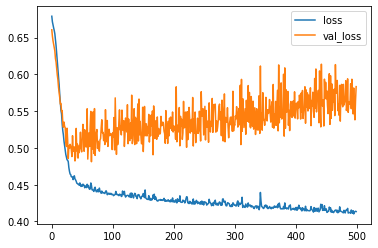

In [107]:
loss_model = pd.DataFrame(model.history.history)
loss_model.plot()

## Model 2

In [109]:
## model2
model2 = Sequential()

model2.add(Dense(30, activation = "relu"))   
model2.add(Dense(15, activation = "relu"))
model2.add(Dense(15, activation = "relu"))

model2.add(Dense(1, activation = "sigmoid"))

model2.compile(loss = "binary_crossentropy", optimizer = "adam")

In [110]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [111]:
model2.fit(x = x_train, y = y_train, epochs = 500, validation_data = (x_test, y_true), verbose = 1, callbacks = [early_stopping])

Epoch 1/500
17/17 [==============================] - 2s 17ms/step - loss: 0.6818 - val_loss: 0.6610
Epoch 2/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6703 - val_loss: 0.6499
Epoch 3/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6632 - val_loss: 0.6412
Epoch 4/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6565 - val_loss: 0.6335
Epoch 5/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6513 - val_loss: 0.6300
Epoch 6/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6429 - val_loss: 0.6199
Epoch 7/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6355 - val_loss: 0.6144
Epoch 8/500
17/17 [==============================] - 0s 6ms/step - loss: 0.6258 - val_loss: 0.6028
Epoch 9/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6149 - val_loss: 0.5993
Epoch 10/500
17/17 [==============================] - 0s 5ms/step - loss: 0.6040 - val_loss: 0.5919
Epoch 11

<AxesSubplot:>

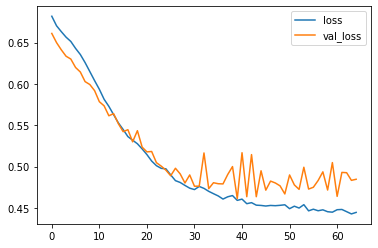

In [112]:
loss_model2 = pd.DataFrame(model2.history.history)
loss_model2.plot()

## Model 3

In [113]:
## model 3
model3 = Sequential()

model3.add(Dense(units=30, activation = "relu"))  
model3.add(Dropout(0.6))


model3.add(Dense(units=15, activation="relu"))
model3.add(Dropout(0.6))

model3.add(Dense(units=15, activation="relu"))
model3.add(Dropout(0.6))

model3.add(Dense(units=1, activation="sigmoid"))

model3.compile(loss="binary_crossentropy", optimizer = "adam")

In [114]:
model3.fit(x = x_train, y = y_train, epochs = 600, validation_data = (x_test, y_true), verbose = 1, callbacks = [early_stopping])

Epoch 1/600
17/17 [==============================] - 2s 18ms/step - loss: 0.7407 - val_loss: 0.6900
Epoch 2/600
17/17 [==============================] - 0s 6ms/step - loss: 0.7006 - val_loss: 0.6829
Epoch 3/600
17/17 [==============================] - 0s 6ms/step - loss: 0.7105 - val_loss: 0.6799
Epoch 4/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6954 - val_loss: 0.6768
Epoch 5/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6802 - val_loss: 0.6742
Epoch 6/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6829 - val_loss: 0.6717
Epoch 7/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6753 - val_loss: 0.6687
Epoch 8/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6773 - val_loss: 0.6659
Epoch 9/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6804 - val_loss: 0.6639
Epoch 10/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6745 - val_loss: 0.6610
Epoch 11

17/17 [==============================] - 0s 6ms/step - loss: 0.5933 - val_loss: 0.5604
Epoch 84/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6059 - val_loss: 0.5608
Epoch 85/600
17/17 [==============================] - 0s 6ms/step - loss: 0.5833 - val_loss: 0.5566
Epoch 86/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5982 - val_loss: 0.5540
Epoch 87/600
17/17 [==============================] - 0s 6ms/step - loss: 0.5884 - val_loss: 0.5531
Epoch 88/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5976 - val_loss: 0.5521
Epoch 89/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5972 - val_loss: 0.5513
Epoch 90/600
17/17 [==============================] - 0s 6ms/step - loss: 0.6039 - val_loss: 0.5511
Epoch 91/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5834 - val_loss: 0.5519
Epoch 92/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5846 - val_loss: 0.5491
Epoch 93/600


17/17 [==============================] - 0s 6ms/step - loss: 0.5219 - val_loss: 0.5212
Epoch 165/600
17/17 [==============================] - 0s 6ms/step - loss: 0.5871 - val_loss: 0.5093
Epoch 166/600
17/17 [==============================] - 0s 6ms/step - loss: 0.5662 - val_loss: 0.5108
Epoch 167/600
17/17 [==============================] - 0s 5ms/step - loss: 0.6007 - val_loss: 0.5161
Epoch 168/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5404 - val_loss: 0.5166
Epoch 169/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5424 - val_loss: 0.5193
Epoch 170/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5382 - val_loss: 0.5173
Epoch 171/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5734 - val_loss: 0.5111
Epoch 172/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5776 - val_loss: 0.5190
Epoch 173/600
17/17 [==============================] - 0s 5ms/step - loss: 0.5508 - val_loss: 0.5163
Epoc

<AxesSubplot:>

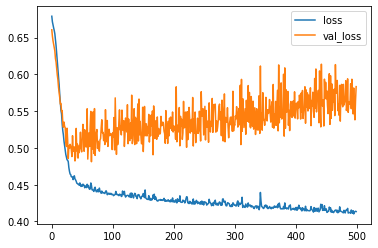

In [115]:
loss_model3 = pd.DataFrame(model.history.history)
loss_model3.plot()

## Predictions for all models

### model1 predictions

In [117]:
prediction1 = (model.predict(x_test) > 0.5).astype("int32")
prediction1

8/8 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [119]:
cnf1 = confusion_matrix(y_true, prediction1)
cnf1

array([[114,  43],
       [ 14,  60]], dtype=int64)

In [121]:
acc1 = accuracy_score(y_true, prediction1)
acc1 *100

75.32467532467533

## model2 predictions

In [122]:
prediction2 = (model2.predict(x_test) > 0.5).astype("int32")
prediction2

8/8 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
    

In [123]:
cnf2 = confusion_matrix(y_true, prediction2)
cnf2

array([[129,  28],
       [ 18,  56]], dtype=int64)

In [124]:
acc2 = accuracy_score(y_true, prediction2)
acc2 * 100

80.08658008658008

## model3 predictions

In [125]:
prediction3 = (model3.predict(x_test) > 0.5).astype("int32")
prediction3

8/8 [==============================] - 0s 2ms/step


array([[1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [126]:
cnf3 = confusion_matrix(y_true, prediction3)
cnf3

array([[139,  18],
       [ 33,  41]], dtype=int64)

In [127]:
acc3 = accuracy_score(y_true, prediction3)
acc3 * 100

77.92207792207793

## model4

In [189]:
## model 4
model4 = Sequential()

model4.add(Dense(units=5, activation = "relu"))  

model4.add(Dense(units=4, activation="relu"))

#model4.add(Dense(units=3, activation="relu"))
#model4.add(Dense(units=10, activation="relu"))

model4.add(Dense(units=1, activation="sigmoid"))

model4.compile(loss="binary_crossentropy", optimizer = "adam")

In [190]:
model4.fit(x = x_train, y = y_train, epochs = 40, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/40
17/17 [==============================] - 1s 13ms/step - loss: 0.6925 - val_loss: 0.6908
Epoch 2/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6903 - val_loss: 0.6883
Epoch 3/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6884 - val_loss: 0.6858
Epoch 4/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6864 - val_loss: 0.6835
Epoch 5/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6847 - val_loss: 0.6810
Epoch 6/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6829 - val_loss: 0.6789
Epoch 7/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6814 - val_loss: 0.6768
Epoch 8/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6800 - val_loss: 0.6746
Epoch 9/40
17/17 [==============================] - 0s 5ms/step - loss: 0.6783 - val_loss: 0.6729
Epoch 10/40
17/17 [==============================] - 0s 4ms/step - loss: 0.6770 - val_loss: 0.6710
Epoch 11/40
17/17 

<AxesSubplot:>

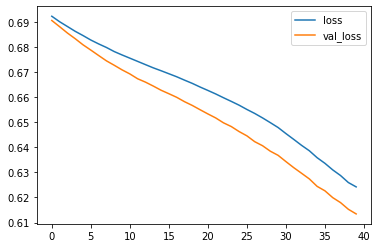

In [191]:
loss_model4 = pd.DataFrame(model4.history.history)
loss_model4.plot()

In [192]:
prediction4 = (model4.predict(x_test) > 0.5).astype("int32")
acc4 = accuracy_score(y_true, prediction4)
acc4 * 100

8/8 [==============================] - 0s 2ms/step


75.75757575757575

## model5

In [198]:
model5 = Sequential()

model5.add(Dense(units = 5, activation = "relu"))

model5.add(Dense(units = 4, activation = "relu"))
model5.add(Dense(units = 1, activation = "sigmoid"))

model5.compile(optimizer = "adam", loss = "binary_crossentropy")

In [199]:
early_stop = EarlyStopping(monitor = "val_loss", patience = 25, verbose = 1, mode = "min")

In [200]:
model5.fit(x = x_train, y = y_train, epochs = 500, validation_data = (x_test, y_true), verbose = 1, callbacks = early_stop)

Epoch 1/500
17/17 [==============================] - 1s 14ms/step - loss: 0.6894 - val_loss: 0.6837
Epoch 2/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6844 - val_loss: 0.6786
Epoch 3/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6805 - val_loss: 0.6736
Epoch 4/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6771 - val_loss: 0.6687
Epoch 5/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6741 - val_loss: 0.6640
Epoch 6/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6710 - val_loss: 0.6609
Epoch 7/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6689 - val_loss: 0.6569
Epoch 8/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6668 - val_loss: 0.6538
Epoch 9/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6651 - val_loss: 0.6512
Epoch 10/500
17/17 [==============================] - 0s 4ms/step - loss: 0.6637 - val_loss: 0.6494
Epoch 11

17/17 [==============================] - 0s 4ms/step - loss: 0.4893 - val_loss: 0.5111
Epoch 84/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4878 - val_loss: 0.5092
Epoch 85/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4870 - val_loss: 0.5085
Epoch 86/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4857 - val_loss: 0.5104
Epoch 87/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4857 - val_loss: 0.5050
Epoch 88/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4844 - val_loss: 0.5137
Epoch 89/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4826 - val_loss: 0.5016
Epoch 90/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4832 - val_loss: 0.5027
Epoch 91/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4813 - val_loss: 0.5013
Epoch 92/500
17/17 [==============================] - 0s 4ms/step - loss: 0.4815 - val_loss: 0.4988
Epoch 93/500


17/17 [==============================] - 0s 2ms/step - loss: 0.4595 - val_loss: 0.4785
Epoch 165/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4598 - val_loss: 0.4834
Epoch 166/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4603 - val_loss: 0.4882
Epoch 167/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4598 - val_loss: 0.4775
Epoch 168/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4605 - val_loss: 0.4883
Epoch 169/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4596 - val_loss: 0.4853
Epoch 170/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4612 - val_loss: 0.4762
Epoch 171/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4590 - val_loss: 0.4901
Epoch 172/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4597 - val_loss: 0.4825
Epoch 173/500
17/17 [==============================] - 0s 2ms/step - loss: 0.4598 - val_loss: 0.4783
Epoc

<AxesSubplot:>

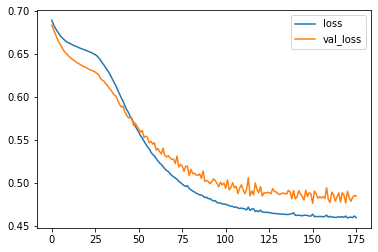

In [201]:
loss_model5 = pd.DataFrame(model5.history.history)
loss_model5.plot()

In [206]:
prediction5 = (model5.predict(x_test) > 0.5).astype("int32")
acc5 = accuracy_score(y_true, prediction5)
acc5 * 100

8/8 [==============================] - 0s 858us/step


80.08658008658008

## model6

In [207]:
model6 = Sequential()

model6.add(Dense(units = 5, activation = "relu"))
model6.add(Dropout(0.2))
model6.add(Dense(units = 4, activation = "relu"))
model6.add(Dropout(0.3))
model6.add(Dense(units = 1, activation = "sigmoid"))

model6.compile(optimizer = "adam", loss = "binary_crossentropy")

In [208]:
early_s = EarlyStopping(monitor = "val_loss", patience = 25, verbose = 1, mode = "min")

In [209]:
model6.fit(x = x_train, y = y_train, epochs = 500, validation_data = (x_test, y_true), verbose = 1, callbacks = early_s)

Epoch 1/500
17/17 [==============================] - 1s 9ms/step - loss: 0.6913 - val_loss: 0.6899
Epoch 2/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6884 - val_loss: 0.6840
Epoch 3/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6807 - val_loss: 0.6747
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6763 - val_loss: 0.6676
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6722 - val_loss: 0.6616
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6676 - val_loss: 0.6561
Epoch 7/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6609 - val_loss: 0.6509
Epoch 8/500
17/17 [==============================] - 0s 3ms/step - loss: 0.6638 - val_loss: 0.6477
Epoch 9/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6625 - val_loss: 0.6447
Epoch 10/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6562 - val_loss: 0.6410
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.5797 - val_loss: 0.5502
Epoch 84/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5779 - val_loss: 0.5486
Epoch 85/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5522 - val_loss: 0.5473
Epoch 86/500
17/17 [==============================] - 0s 3ms/step - loss: 0.5710 - val_loss: 0.5490
Epoch 87/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5742 - val_loss: 0.5482
Epoch 88/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5694 - val_loss: 0.5473
Epoch 89/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5800 - val_loss: 0.5475
Epoch 90/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5495 - val_loss: 0.5487
Epoch 91/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5771 - val_loss: 0.5458
Epoch 92/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5740 - val_loss: 0.5477
Epoch 93/500


17/17 [==============================] - 0s 2ms/step - loss: 0.5382 - val_loss: 0.5228
Epoch 165/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5360 - val_loss: 0.5234
Epoch 166/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5559 - val_loss: 0.5257
Epoch 167/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5586 - val_loss: 0.5270
Epoch 168/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5473 - val_loss: 0.5257
Epoch 169/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5432 - val_loss: 0.5235
Epoch 170/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5351 - val_loss: 0.5179
Epoch 171/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5386 - val_loss: 0.5136
Epoch 172/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5350 - val_loss: 0.5206
Epoch 173/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5464 - val_loss: 0.5202
Epoc

<AxesSubplot:>

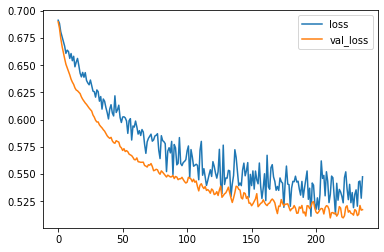

In [210]:
loss_model6 = pd.DataFrame(model6.history.history)
loss_model6.plot()

In [211]:
prediction6 = (model6.predict(x_test) > 0.5).astype("int32")
acc6 = accuracy_score(y_true, prediction6)
acc6 * 100

8/8 [==============================] - 0s 855us/step


74.45887445887446